In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

##### Reading Data

In [116]:
def read_data(path):
    try:
        data_open = pd.read_csv(path)
        print("data read successfully.")
        
        try:
            x = data_open.iloc[:, :-1]
            y = data_open.iloc[:, -1]
            print("x and y created sucessfully")
        
            return data_open, x, y
        
        except:
            print("check your path.")
            return -1
    except:
        print("check your path.")
        return -1

    

In [117]:
data, x, y = read_data("data/Concrete_Data.csv")

data read successfully.
x and y created sucessfully


In [118]:
x.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


In [119]:
y.describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: strength, dtype: float64

##### Corelation matrix

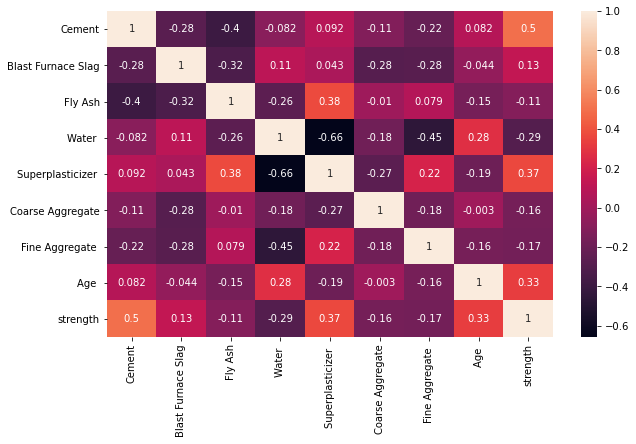

In [120]:
corr_matrix = data.corr()
plt.subplots(figsize=(10,6))
sn.heatmap(corr_matrix, annot=True)
plt.show()

##### Pair Plots

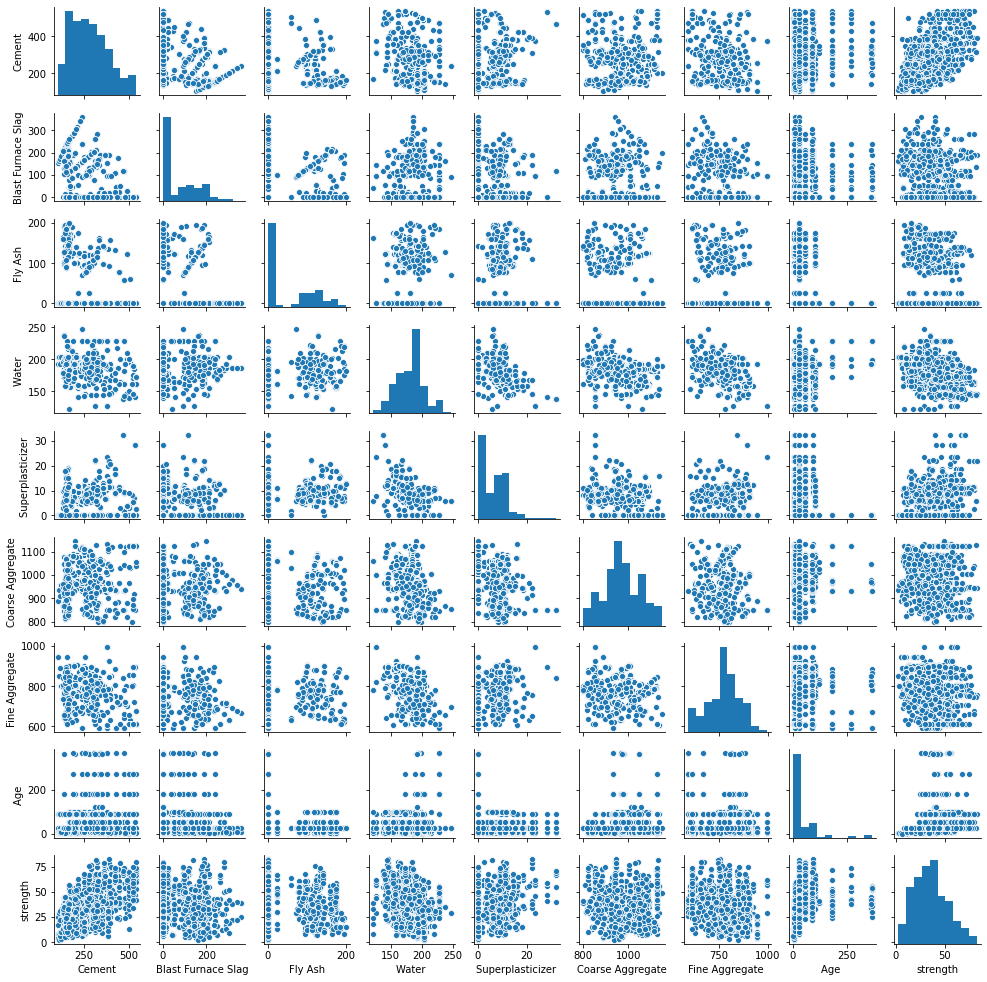

In [121]:
sn.pairplot(data, height=1.5)

##### train test split

In [122]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


##### standard scaling

In [123]:
from sklearn.preprocessing import StandardScaler

standard_scale = StandardScaler()
x_train = standard_scale.fit_transform(x_train)
x_test = standard_scale.fit_transform(x_test)

# Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import math

y_linear_test_pred = linear.predict(x_test)
y_linear_train_pred = linear.predict(x_train)

print(mean_absolute_error(y_test, y_linear_test_pred))
print(mean_absolute_error(y_train, y_linear_train_pred))

print(r2_score(y_test, y_linear_test_pred))
print(r2_score(y_train, y_linear_train_pred))

print(math.sqrt(mean_squared_error(y_test, y_linear_test_pred)))
print(math.sqrt(mean_squared_error(y_train, y_linear_train_pred)))

7.797785750775952
8.330108766506683
0.6189650039386505
0.6105238047649741
9.908779663955185
10.5187873348198


# Polynomial regression

In [126]:
from sklearn.preprocessing import PolynomialFeatures


poly_feat = PolynomialFeatures(degree = 3, include_bias = False)
x_train_poly = poly_feat.fit_transform(x_train)
x_test_poly = poly_feat.fit_transform(x_test)

linear1 = LinearRegression()
linear1.fit(x_train_poly, y_train)

y_poly_test_pred = linear1.predict(x_test_poly)
y_poly_train_pred = linear1.predict(x_train_poly)

print(mean_absolute_error(y_test, y_poly_test_pred))
print(mean_absolute_error(y_train, y_poly_train_pred))

print(r2_score(y_test, y_poly_test_pred))
print(r2_score(y_train, y_poly_train_pred))

print(math.sqrt(mean_squared_error(y_test, y_poly_test_pred)))
print(math.sqrt(mean_squared_error(y_train, y_poly_train_pred)))

5.7418877184588215
3.412796568042358
0.7369175507863599
0.9310620721581928
8.233484588851503
4.425418305487631
